<a href="https://colab.research.google.com/github/LucioFassarella/AMC/blob/main/Qiskit_Separador_de_Feixe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red"><b>Computação Quântica</b></font>

<center><img align = "center" src="https://drive.google.com/uc?export=view&id=1usXrPscUXzfQF5wNtkvuVGARuuhcgyw-" alt="grafo" width="500"></center>

<center>"You never understand things. You just get used to them." (John von Neumann)</center>

---

<font color = "orange">**Qiskit**:</font>
*   [Python's Instalation](https://pypi.org/project/qiskit/)
*   [IBM Quantum cloud](https://quantum.cloud.ibm.com/)
    *   [Qiskit connect](https://cloud.ibm.com/docs/quantum-computing?topic=quantum-computing-get-started) (IBM Runtime Service)
       *   [Getting Started](https://cloud.ibm.com/docs/quantum-computing?topic=quantum-computing-get-started)
*   [Qiskit](https://docs.quantum.ibm.com/api/qiskit)
    *   [Qiskit Quantum Circuit](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit)
    *   [Qiskit Circuit Library](https://docs.quantum.ibm.com/api/qiskit/circuit_library)
    *   [Qiskit Gates Tutorial](https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits/3_summary_of_quantum_operations.ipynb)
    *   [List of Quantum Logic Gates](https://en.wikipedia.org/wiki/List_of_quantum_logic_gates)

[<font color="orange">**Execution modes**</font>](https://quantum.cloud.ibm.com/docs/en/guides/execution-modes)

*	[Choose the execution mode](https://quantum.cloud.ibm.com/docs/en/guides/choose-execution-mode)
*   [Single Job](https://quantum.cloud.ibm.com/docs/en/guides/primitives-examples#estimator-examples)
*	[Batch mode](https://quantum.cloud.ibm.com/docs/en/guides/run-jobs-batch)
*	[Section mode](https://quantum.cloud.ibm.com/docs/en/guides/run-jobs-session)
*	[Primitives examples](https://quantum.cloud.ibm.com/docs/en/guides/primitives-examples)


[<font color="green">**Local simulators**</font>](https://quantum.cloud.ibm.com/docs/en/migration-guides/local-simulators)

---

⏬

## QISKIT: Carregamento

In [2]:
!pip install qiskit -U
!pip install qiskit_aer -U
!pip install qiskit-ibm-runtime -U

!pip install matplotlib
!pip install pylatexenc

import qiskit
qiskit.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.8/381.8 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=ce01e2a925246efa1becf41ef9c328ee8baed922cd4c6c96778a8d8e78b0abb2
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178b

'2.3.0'

In [3]:
# Qiskit: métodos básicos

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from qiskit import transpile

from qiskit.visualization import plot_histogram, array_to_latex, plot_state_city

# AER Simulator

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# 1. Create the Quantum Circuit (Bell State)
qc = QuantumCircuit(2, 2)
qc.h(0)           # Hadamard gate on qubit 0
qc.cx(0, 1)       # CNOT gate (control: 0, target: 1)
qc.measure([0, 1], [0, 1]) # Measure both qubits

# 2. Set up the Simulator
simulator = AerSimulator()

# 3. Run the Circuit
job = simulator.run(qc, shots=1000)
result = job.result()

# 4. Get and Print Results
counts = result.get_counts(qc)
print("\nTotal counts:", counts)

# 5. Visualize Results
plot_histogram(counts)
plt.show()


Total counts: {'11': 499, '00': 501}


# Separador de Feixe com Detector de Caminho

<b>Como modelar o sistema constituído por um separador de feixe combinado com uma transformação que interage somente com uma parte do feixe separado?</b>

<center><img align = "center" src="https://drive.google.com/uc?export=view&id=1LaKBXspAhXLbdnrGgDWQuSRmGki-0OVl" alt="grafo" width="500"></center>

<center>Separador de Feixe com transformação em somente parte do
estado separado.</center>

A situação é análoga ao experimento da <i>Dupla Fenda com detector de caminho</i>...

⬇

<b> Modelagem por circuito quântico</b>


Podemos modelar a situação usando dois qubits: um para representar o feixe (qubit principal) e outro (qubit auxiliar) para distinguir a <i>transmissão/deflexão</i>. Denotando o qubit principal por $q_0$, o qubit auxiliar por $q_1$ e considerando que a transformação que atua somente no feixe transmitido é dada por um operador $U$, o circuito é dado pela composição dos seguintes operadores:

*   $R_{y;0}(s)$: rotação do qubit $q_0$ representando a separação de feixes com índices de transmissão/reflexão dependentes do parâmetro $s \in \left\lbrack 0, 2\pi \right)$;
*   $CX_{0\rightarrow 1}^{0}$: CNOT com qubit de controle $q_0$, qubit alvo $q_1$ e valor de ativação $q_0 = 0$;
*   $CU_{1\rightarrow 1}^{1}$: CU com qubit de controle $q_1$, qubit alvo $q_0$ e valor de ativação $q_1 = 1$.


<font color = "gray">Observação: $U(\theta, \phi, \lambda)$ é a porta geral de 1 qubit. Essa porta controlada leva mais um parâmetro, colocado $0$ no circuito abaixo. Para detalhes, veja: [https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.library.CUGate](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.library.CUGate).</font>

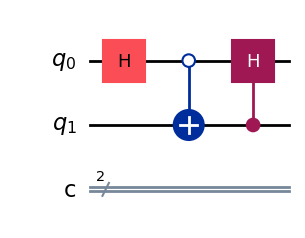

<IPython.core.display.Latex object>

In [ ]:
# Pacotes

import numpy as np

# Circuito

qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1, ctrl_state = '0')
qc.ch(1, 0, ctrl_state = '1')
#qc.measure([0,1],[0,1])

display(qc.draw('mpl'))

# Estado final

from qiskit.quantum_info import Statevector

statevector = Statevector.from_instruction(qc)
statevector.draw('latex')

# Modelagem Quântica de Cadeia Markoviana 1

$$
T = \begin{bmatrix}
p_{00} & p_{01}\\
p_{10} & p_{11}
\end{bmatrix};\ p_{00} + p_{10} = 1,\ p_{01} + p_{11} = 1.
$$

$$
\left\lbrack 0, \pi \right\rbrack \ni \theta_0 := \left\lbrace%
\begin{array}{l}
2\arctan(\sqrt{p_{10}/p_{00}})  &,\ \text{se}\ p_{00} \neq 0,\\
\pi &,\ \text{se}\ p_{00} = 0.
\end{array}
\right. .
$$


$$
\left\lbrack 0, \pi \right\rbrack \ni \theta_1 := \left\lbrace%
\begin{array}{l}
2\arctan(\sqrt{p_{01}/p_{11}})  &,\ \text{se}\ p_{11} \neq 0,\\
\pi &,\ \text{se}\ p_{11} = 0.
\end{array}
\right.
$$

$$
\cos^2\left(\frac{\theta_0}{2}\right) = p_{00},\ \sin^2\left(\frac{\theta_0}{2}\right) = p_{10};
$$

$$
\sin^2\left(\frac{\theta_1}{2}\right) = p_{01},\ \cos^2\left(\frac{\theta_1}{2}\right) = p_{11}.
$$

Agora,
$$
\psi = \begin{pmatrix}
a\\
b
\end{pmatrix},\ a,b \ge 0,\ a + b = 1.
$$

$$
T\psi = \begin{bmatrix}
p_{00}a + p_{01}b\\
p_{10}a + p_{11}b
\end{bmatrix}.
$$

Considere
$$
\alpha = \sqrt{a},\ \beta = \sqrt{b}.
$$

$$
| \psi \rangle := \alpha |0\rangle + \beta |1\rangle
$$

$$
R_y(\theta_0) = \begin{bmatrix}
\cos\left(\frac{\theta_0}{2}\right) & - \sin\left(\frac{\theta_0}{2}\right) \\
\sin\left(\frac{\theta_0}{2}\right)  & \cos\left(\frac{\theta_0}{2}\right)
\end{bmatrix}
$$
e
$$
R_y(\theta_0) |0\rangle = %
\begin{bmatrix}
\cos\left(\frac{\theta_0}{2}\right) & - \sin\left(\frac{\theta_0}{2}\right) \\
\sin\left(\frac{\theta_0}{2}\right)  & \cos\left(\frac{\theta_0}{2}\right)
\end{bmatrix}%
\begin{bmatrix}
1\\
0
\end{bmatrix} = %
\begin{bmatrix}
\cos\left(\frac{\theta_0}{2}\right) \\
\sin\left(\frac{\theta_0}{2}\right)
\end{bmatrix} = %
\cos\left(\frac{\theta_0}{2}\right)|0\rangle +
\sin\left(\frac{\theta_0}{2}\right)|1\rangle.
$$

Portanto:

$$
\begin{split}
P(0 | R_y(\theta_0) |0\rangle) &= \cos^2\left(\frac{\theta_0}{2}\right) = p_{00},\\ %
P(1 | R_y(\theta_0) |0\rangle) &=
\sin^2\left(\frac{\theta_0}{2}\right) = p_{10}.
\end{split}
$$

Analogamente,

$$
\begin{split}
P(0 | R_y(\theta_1) |0\rangle) &= \sin^2\left(\frac{\theta_1}{2}\right) = p_{01},\\ %
P(1 | R_y(\theta_1) |0\rangle) &=
\cos^2\left(\frac{\theta_1}{2}\right) = p_{11}.
\end{split}
$$

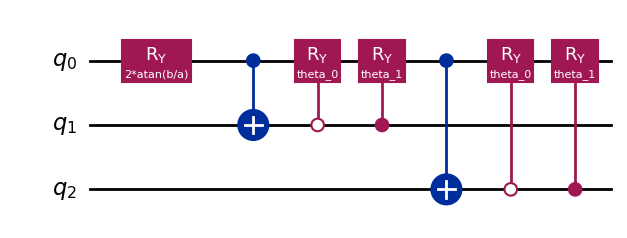

<IPython.core.display.Latex object>

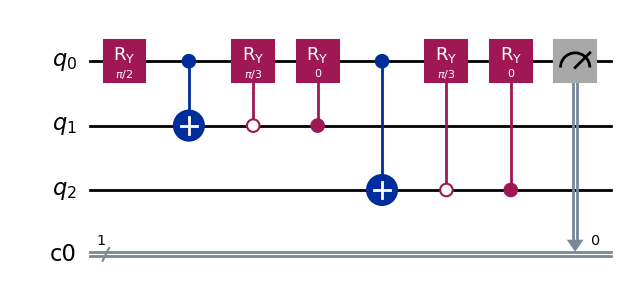

In [4]:
import numpy as np
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector

#

'''
# Atribuição de valores a parâmetros

valores_dict = {theta_0: np.pi/3, theta_1: np.pi/4}

qc_valores = qc.assign_parameters(valores_dict)

'''

# Parâmetros
theta_0 = Parameter('theta_0')
theta_1 = Parameter('theta_1')

a = Parameter('a')
b = Parameter('b')
phi = 2*np.arctan(b/a)

# No. de iterações
num_iteracoes = 2

#qc = QuantumCircuit(2,2)
qc = QuantumCircuit(1 + num_iteracoes)

# Inicialização
# qc.initialize(estado_inicial, 0)
qc.ry(phi, 0)

# Loop de iterações
for iteracao in range(num_iteracoes):
    # Emaranhamento
    qc.cx(0,iteracao + 1, ctrl_state = '1')
    # Transformação markoviana
    qc.cry(theta_0, iteracao + 1, 0, ctrl_state = '0')
    qc.cry(theta_1, iteracao + 1, 0, ctrl_state = '1')

display(qc.draw('mpl'))

# Atribuição de valores e estadovetor
valores_dict = {theta_0: 2*np.arctan(np.sqrt((1/4)/(3/4))), theta_1: 0, a: np.sqrt(1/2), b: np.sqrt(1/2)}
#valores_dict = {a: np.sqrt(3/4), b: np.sqrt(1/4)}

qc_valores = qc.assign_parameters(valores_dict)

estado = Statevector.from_instruction(qc_valores)
display(estado.draw('latex'))

# Inserção de registro clássico

cr = ClassicalRegister(1)

qc_valores.add_register(cr)

qc_valores.measure(0,0)

display(qc_valores.draw('mpl'))

# Modelagem Quântica de Cadeia Markoviana 2

$$
T = \begin{bmatrix}
p_{00} & p_{01}\\
p_{10} & p_{11}
\end{bmatrix};\ p_{00} + p_{10} = 1,\ p_{01} + p_{11} = 1.
$$

$$
\left\lbrack 0, \pi \right\rbrack \ni \theta_0 := \left\lbrace%
\begin{array}{l}
2\arctan(\sqrt{p_{10}/p_{00}})  &,\ \text{se}\ p_{00} \neq 0,\\
\pi &,\ \text{se}\ p_{00} = 0.
\end{array}
\right. .
$$


$$
\left\lbrack 0, \pi \right\rbrack \ni \theta_1 := \left\lbrace%
\begin{array}{l}
2\arctan(\sqrt{p_{01}/p_{11}})  &,\ \text{se}\ p_{11} \neq 0,\\
\pi &,\ \text{se}\ p_{11} = 0.
\end{array}
\right.
$$

$$
\cos^2\left(\frac{\theta_0}{2}\right) = p_{00},\ \sin^2\left(\frac{\theta_0}{2}\right) = p_{10};
$$

$$
\sin^2\left(\frac{\theta_1}{2}\right) = p_{01},\ \cos^2\left(\frac{\theta_1}{2}\right) = p_{11}.
$$

Agora,
$$
\psi = \begin{pmatrix}
a\\
b
\end{pmatrix},\ a,b \ge 0,\ a + b = 1.
$$

$$
T\psi = \begin{bmatrix}
p_{00}a + p_{01}b\\
p_{10}a + p_{11}b
\end{bmatrix}.
$$

Considere
$$
\alpha = \sqrt{a},\ \beta = \sqrt{b}.
$$

$$
| \psi \rangle := \alpha |0\rangle + \beta |1\rangle
$$

$$
R_y(\theta_0) = \begin{bmatrix}
\cos\left(\frac{\theta_0}{2}\right) & - \sin\left(\frac{\theta_0}{2}\right) \\
\sin\left(\frac{\theta_0}{2}\right)  & \cos\left(\frac{\theta_0}{2}\right)
\end{bmatrix}
$$
e
$$
R_y(\theta_0) |0\rangle = %
\begin{bmatrix}
\cos\left(\frac{\theta_0}{2}\right) & - \sin\left(\frac{\theta_0}{2}\right) \\
\sin\left(\frac{\theta_0}{2}\right)  & \cos\left(\frac{\theta_0}{2}\right)
\end{bmatrix}%
\begin{bmatrix}
1\\
0
\end{bmatrix} = %
\begin{bmatrix}
\cos\left(\frac{\theta_0}{2}\right) \\
\sin\left(\frac{\theta_0}{2}\right)
\end{bmatrix} = %
\cos\left(\frac{\theta_0}{2}\right)|0\rangle +
\sin\left(\frac{\theta_0}{2}\right)|1\rangle.
$$

Portanto:

$$
\begin{split}
P(0 | R_y(\theta_0) |0\rangle) &= \cos^2\left(\frac{\theta_0}{2}\right) = p_{00},\\ %
P(1 | R_y(\theta_0) |0\rangle) &=
\sin^2\left(\frac{\theta_0}{2}\right) = p_{10}.
\end{split}
$$

Analogamente,

$$
\begin{split}
P(0 | R_y(\theta_1) |0\rangle) &= \sin^2\left(\frac{\theta_1}{2}\right) = p_{01},\\ %
P(1 | R_y(\theta_1) |0\rangle) &=
\cos^2\left(\frac{\theta_1}{2}\right) = p_{11}.
\end{split}
$$



Então:

$$
U_{T} = C\hspace{-1mm}R_y(\theta_1)^{\qty[1]}_{1\rightarrow 0}\circ C\hspace{-1mm}R_y(\theta_0)^{\qty[0]}_{1\rightarrow 0}\circ C\hspace{-1mm}X^{\qty[1]}_{0 \rightarrow 1} \circ U_{\alpha,\beta}
$$

$$
\begin{split}
|00\rangle \xrightarrow{U_{\alpha,\beta}}&\ \alpha |00\rangle + \beta|01\rangle\\
\xrightarrow{C\hspace{-1mm}X^{\qty[1]}_{0 \rightarrow 1}}&\ \alpha |00\rangle + \beta|11\rangle\\
\xrightarrow{C\hspace{-1mm}R_y(\theta_1)^{\qty[1]}_{1\rightarrow 0}\circ C\hspace{-1mm}R_y(\theta_0)^{\qty[0]}_{1\rightarrow 0}}&\ \alpha |0\rangle \otimes \left\lbrack R_y(\theta_0)|0\rangle \right\rbrack + \beta |1\rangle \otimes \left\lbrack  R_y(\theta_1)|1\rangle \right\rbrack \\
 = &\ \alpha |0\rangle \otimes \left\lbrack \cos\left(\frac{\theta_0}{2}\right)|0\rangle + \sin\left(\frac{\theta_0}{2}\right)|1\rangle \right\rbrack + %
  \beta |1\rangle \otimes \left\lbrack - \sin\left(\frac{\theta_1}{2}\right)|0\rangle + \cos\left(\frac{\theta_1}{2}\right)|1\rangle \right\rbrack \\
 =&\  \alpha \cos\left(\frac{\theta_0}{2}\right)|00\rangle + \alpha\sin\left(\frac{\theta_0}{2}\right)|01\rangle - \beta\sin\left(\frac{\theta_1}{2}\right)|10\rangle + \cos\left(\frac{\theta_1}{2}\right)|11\rangle\\
 &=\ \left\lbrack \alpha \cos\left(\frac{\theta_0}{2}\right)|0\rangle - \beta\sin\left(\frac{\theta_1}{2}\right)|1\rangle\right\rbrack  |0\rangle + %
 \left\lbrack \alpha\sin\left(\frac{\theta_0}{2}\right)|0\rangle + \cos\left(\frac{\theta_1}{2}\right)|1\rangle\right\rbrack |1\rangle.
\end{split}
$$

Probabilidade de medir o qubit-$0$ e obter $0$:
$$
\begin{split}
P_0 (0) &=\ \left|\alpha \cos\left(\frac{\theta_0}{2}\right)\right|^2 + \left| \beta \sin\left(\frac{\theta_1}{2}\right) \right|^2\\
&=\ \alpha^2\cos^2\left(\frac{\theta_0}{2}\right) + \beta^2 \sin^2\left(\frac{\theta_1}{2}\right)\\
&= ap_{00} + bp_{01}
\end{split}
$$


Probabilidade de medir o qubit-$0$ e obter $1$:
$$
\begin{split}
P_0 (1) &=\ \left|\alpha \sin\left(\frac{\theta_0}{2}\right)\right|^2 + \left| \beta \cos\left(\frac{\theta_1}{2}\right) \right|^2\\
&=\ \alpha^2\sin^2\left(\frac{\theta_0}{2}\right) + \beta^2 \cos^2\left(\frac{\theta_1}{2}\right)\\
&= ap_{10} + bp_{11}
\end{split}
$$

Portanto:

$$
T\psi = \mu_0 U_T |\psi\rangle = \begin{bmatrix}
P_0(0)\\
P_0(1)
\end{bmatrix},
$$
onde
$$
\mu_0:\ \text{processo de medida do qubit-$0$}.
$$

Indicando a medida do qubit-$1$ com inicialização no estado $|0\rangle$ por $\eta_1$,
$$
\eta_1 \left\lbrack \alpha |0\rangle + \beta|1\rangle \right\rbrack \otimes |\phi\rangle =
$$



In [ ]:
import numpy as np

def Angulo(T):
    '''
    Método que retorna os ângulos theta_0 e theta_1 de T

    Entrada:
        T: matriz (2x2) de transição de uma transformação de Markov

    Saída:
        theta_0: ângulo theta_0 de T
        theta_1: ângulo theta_1 de T
    '''

    if T[0,0] == 0:
        theta_0 = np.pi
    else:
        theta_0 = 2*np.arctan(np.sqrt(T[1,0]/T[0,0]))

    if T[1,1] == 0:
        theta_1 = np.pi
    else:
        theta_1 = 2*np.arctan(np.sqrt(T[0,1]/T[1,1]))

    return theta_0, theta_1

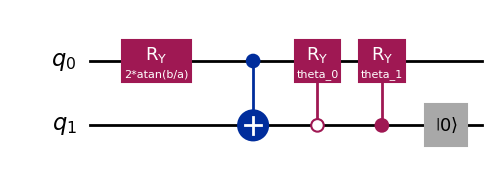

<IPython.core.display.Latex object>

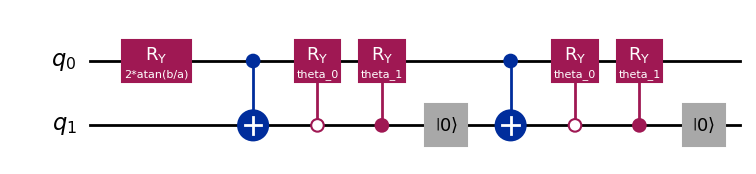

<IPython.core.display.Latex object>

In [ ]:
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector

#

'''
# Atribuição de valores a parâmetros

valores_dict = {theta_0: np.pi/3, theta_1: np.pi/4}

qc_valores = qc.assign_parameters(valores_dict)

'''

# Parâmetros
theta_0 = Parameter('theta_0')
theta_1 = Parameter('theta_1')

a = Parameter('a')
b = Parameter('b')
phi = 2*np.arctan(b/a)

# No. de iterações
num_iteracoes = 2

#qc = QuantumCircuit(2,2)
qc = QuantumCircuit(1 + 1)

# Inicialização
# qc.initialize(estado_inicial, 0)
qc.ry(phi, 0)

# Atribuição de valores e estadovetor
valores_dict = {theta_0: 2*np.arctan(np.sqrt((1/4)/(3/4))), theta_1: 0, a: np.sqrt(1/2), b: np.sqrt(1/2)}
#valores_dict = {a: np.sqrt(3/4), b: np.sqrt(1/4)}

# Loop de iterações
for iteracao in range(num_iteracoes):
    # Emaranhamento
    qc.cx(0,1, ctrl_state = '1')
    # Transformação markoviana
    qc.cry(theta_0, 1, 0, ctrl_state = '0')
    qc.cry(theta_1, 1, 0, ctrl_state = '1')
    qc.reset(1)# = qc.initialize('0',1)
    display(qc.draw('mpl'))

    qc_valores = qc.assign_parameters(valores_dict)

    estado = Statevector.from_instruction(qc_valores)
    display(estado.draw('latex'))